In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
!tree -dL 2 data/aclImdb

매개 변수가 너무 많습니다 - 2


In [16]:
from sklearn.datasets import load_files

reviews_train = load_files("C:\/Users/iws1/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [17]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [18]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [20]:
reviews_test = load_files("C:\/Users/iws1/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


In [21]:
bards_words = ["The fool doth think he is wise,", "but the wise man knows himself to be a fool"]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [24]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [25]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [26]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [27]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x73822 sparse matrix of type '<class 'numpy.int64'>'
	with 3380668 stored elements in Compressed Sparse Row format>


In [28]:
feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n", feature_names[::2000])

특성 개수: 73822
처음 20개 특성:
 ['00', '000', '00000000000', '00000001', '000dm', '001', '0069', '007', '0079', '007s', '0083', '009', '00am', '00o', '00pm', '00s', '00schneider', '01', '0126', '0148']
20010에서 20030까지 특성:
 ['drought', 'drove', 'drover', 'droves', 'drowing', 'drown', 'drowned', 'drowning', 'drownings', 'drowns', 'drowsy', 'dru', 'drubbed', 'drubbing', 'drudge', 'drudgery', 'drudges', 'drudging', 'druedain', 'drug']
매 2000번째 특성:
 ['00', 'afflicted', 'ardal', 'basket', 'boiled', 'calculating', 'chitty', 'congealed', 'cushioned', 'devoted', 'droplet', 'envogue', 'felled', 'frontline', 'gorman', 'header', 'hypnotism', 'intruments', 'kerchiefs', 'leos', 'malerie', 'microwaves', 'mutually', 'oedipus', 'pasts', 'polaroids', 'pushtun', 'remnar', 'runner', 'sentencing', 'slips', 'starkly', 'swiches', 'tings', 'ulloa', 'venice', 'widen']


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("교차 검증 평균 점수: {:.2f}".format(np.mean(scores)))

교차 검증 평균 점수: 0.89


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:", grid.best_params_)

최상의 교차 검증 점수: 0.89
최적의 매개변수: {'C': 0.1}


In [31]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.98


In [32]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x26750 sparse matrix of type '<class 'numpy.int64'>'
	with 3304113 stored elements in Compressed Sparse Row format>


In [33]:
feature_names = vect.get_feature_names()

print("처음 50개 특성:\n", feature_names[:50])
print("20,010부터 20,030까지 특성:\n", feature_names[20010:20030])
print("매 700번째 특성:\n", feature_names[::700])

처음 50개 특성:
 ['00', '000', '007', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '105', '107', '108', '109', '10th', '11', '110', '111', '116', '117', '11th', '12', '120', '125', '12th', '13', '130', '13th', '14', '140', '14th', '15', '150', '1500', '15th', '16', '16mm', '16s', '16th', '17', '170', '1700']
20,010부터 20,030까지 특성:
 ['riddled', 'riddler', 'riddles', 'ride', 'rider', 'riders', 'rides', 'ridge', 'ridgemont', 'ridges', 'ridicule', 'ridiculed', 'ridicules', 'ridiculous', 'ridiculously', 'ridiculousness', 'riding', 'ridley', 'riefenstahl', 'rife']
매 700번째 특성:
 ['00', 'affiliates', 'arbitrary', 'baritone', 'boats', 'caddish', 'childishness', 'completion', 'craziest', 'delinquent', 'distinguish', 'egg', 'exceptional', 'finishing', 'gail', 'grim', 'hesitant', 'immortalized', 'invasion', 'kinetic', 'lipped', 'martha', 'mistakes', 'netherlands', 'oswalt', 'permanently', 'prankster', 'quintet', 'renamed', 'rotting', 'selfishness', 'sk

In [34]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최적의 교차 검증 점수: 0.89


In [37]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['nothing', 'keep', 'none', 'last', 'at', 'whereas', 'since', 'your', 'must', 'top', 'toward', 'several', 'someone', 'beside', 'had', 'mine', 'whereafter', 'empty', 'everyone', 'detail', 'rather', 'seems', 'but', 'couldnt', 'once', 'hence', 'also', 'anyway', 'bottom', 'hereupon', 'eight', 'part']


In [38]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26446 sparse matrix of type '<class 'numpy.int64'>'
	with 2116165 stored elements in Compressed Sparse Row format>


In [41]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.89


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상이 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상이 교차 검증 점수: 0.90


In [45]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다.
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다.
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름을 구합니다.
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['ridges' 'intervenes' 'superimpose' 'funakoshi' 'homayoun' 'ershadi'
 'mahmoodzada' 'fetch' 'illusory' 'prized' 'ballyhara' 'landowners'
 'figment' 'ignites' 'crest' 'thickly' 'inspect' 'berates' 'signaled'
 'succumbed']
가장 높은 tfidf를 가진 특성:
 ['farscape' 'prot' 'shemp' 'shark' 'br' 'rai' 'akasha' 'jokes' 'critters'
 'knotts' 'primary' 'tarzan' 'wine' 'bad' 'gamera' 'cycle' 'lull' 'ernest'
 'ghoulies' 'robot']


In [46]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'br' 'one' 'have' 'be' 'film' 'you' 'are'
 'all' 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'if' 'they' 'there' 'out'
 'his' 'just' 'or' 'about' 'he' 'what' 'has' 'some' 'can' 'good' 'when'
 'more' 'up' 'time' 'very' 'even' 'see' 'only' 'my' 'would' 'no' 'well'
 'really' 'which' 'me' 'story' 'had' 'much' 'their' 'than' 'other' 'were'
 'get' 'do' 'been' 'don' 'most' 'also' 'how' 'great' 'into' 'will' 'first'
 'because' 'make' 'her' 'people' 'made' 'bad' 'way' 'could' 'them' 'we'
 'any' 'after' 'then' 'too' 'watch' 'movies' 'seen' 'acting' 'think' 'she'
 'characters']


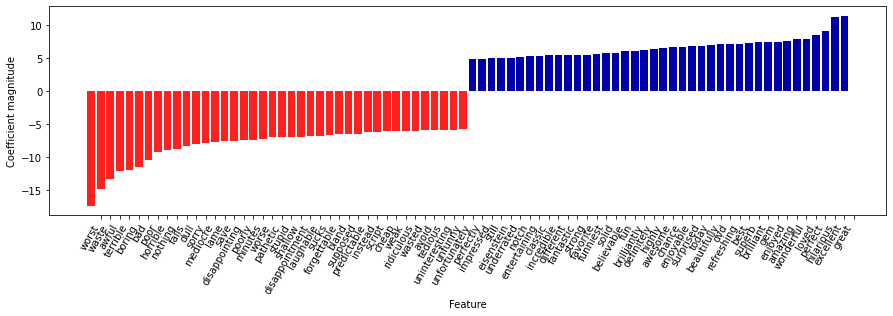

In [47]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_[0],
                                    feature_names, n_top_features=40)

In [48]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [49]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [50]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 14
어휘 사전:
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [51]:
print("변환된 데이터 (밀집 배열):\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [52]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 39
어휘 사전:
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [53]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에
# 그리드 서치 실행에 시간이 오래 걸립니다.
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

최상의 교차 검증 점수: 0.92
최적의 매개변수:
 {'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 2)}


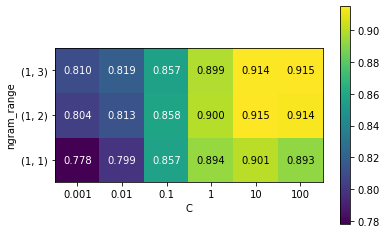

In [56]:
# 그리드 서치에서 테스트 점수를 추출합니다.
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다.
heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
                               xticklabels=param_grid['logisticregression__C'],
                                 yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

(153279,)
(153279,)


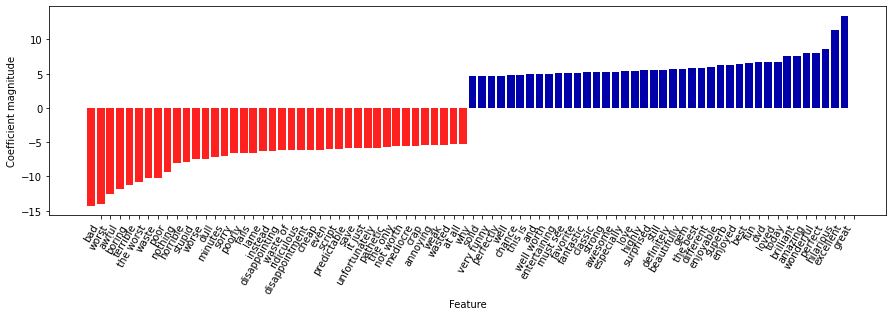

In [71]:
# 특성 이름과 계수를 추출합니다.
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

In [78]:
# 트라이그램 특성을 찾습니다.
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다.
# mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

(153279,)
(0,)


In [80]:
import spacy

ModuleNotFoundError: No module named 'spacy'